# Первое задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
df = pd.read_csv("false_plots_data1.csv", sep=";")
df

,year,company,"revenue, $K",rate
0,2008,Shmuber,5,100 %
1,2008,Kett,1000,100 %
2,2008,Tindex Taxi,890,100 %
3,2008,Krap,899,100 %
4,2008,Loft,760,100 %
5,2009,Shmuber,85,80.00
6,2009,Kett,950,-50.00
7,2009,Tindex Taxi,800,-90.00
8,2009,Krap,890,-9.00
9,2009,Loft,760,0.00


В исходном excel документе калонка rate получена странным способом: 

1. для всех годов кроме 2008 значенние rate для каждого года получено вычитанием revenue 2008 из revenue текущего года, что показывает на сколько в абсолютных цыфрах компания вырасла за время прошедшее с 2008 года;
1. значение rete для 2008 года — в процентнах, в то время, как значение для всех остальных годов — в обсолбтных величинах.

Исправим это.

In [3]:
df.columns = ["year", "company", "revenue", "rate"]
df.rate[:5] = None
df_copy = df.astype({"rate": "float64"})

In [4]:
df = df_copy.copy()

# Sumbstruct the previous year from current for each company and devide by the previous.
df["rate"] = (df["revenue"] - df.groupby("company")["revenue"].shift()) / df.groupby("company")["revenue"].shift()


revenue = df.pivot(index="year", columns="company", values="revenue")
rate_to_2008 = (
    ((revenue - revenue.iloc[0, :]) / revenue.iloc[0, :])
    .unstack()
    .to_frame()
    .rename(columns={0: "rate to 2008"})
    .reset_index()
)

df = df.merge(rate_to_2008, on=["year", "company"])

df


,year,company,revenue,rate,rate to 2008
0,2008,Shmuber,5,NaN,0.000000
1,2008,Kett,1000,NaN,0.000000
2,2008,Tindex Taxi,890,NaN,0.000000
3,2008,Krap,899,NaN,0.000000
4,2008,Loft,760,NaN,0.000000
5,2009,Shmuber,85,16.000000,16.000000
6,2009,Kett,950,-0.050000,-0.050000
7,2009,Tindex Taxi,800,-0.101124,-0.101124
8,2009,Krap,890,-0.010011,-0.010011
9,2009,Loft,760,0.000000,0.000000


In [5]:
(967 - 895) / 895

0.08044692737430167

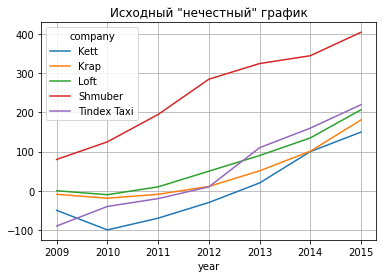

In [6]:
df_copy.pivot_table(
    index="year",
    columns="company",
    values="rate"
).plot.line(grid=True, title='Исходный "нечестный" график');

По графику может показаться, что Shmuber намного круче компаний-конкурентов. Причем именно "показаться" и именно "круче", какой-то более осмысленный вывод сделать не получится, так как не ясно, в каках единицах измеряется rate (см. описание проблемы выше).

In [7]:
# plt.subplots()
pivot = df.pivot(
    index="year",
    columns="company",
)
pivot

revenue                                     rate                      \
company    Kett  Krap Loft Shmuber Tindex Taxi      Kett      Krap      Loft   
year                                                                           
2008       1000   899  760       5         890       NaN       NaN       NaN   
2009        950   890  760      85         800 -0.050000 -0.010011  0.000000   
2010        900   880  750     130         850 -0.052632 -0.011236 -0.013158   
2011        930   890  770     200         870  0.033333  0.011364  0.026667   
2012        970   910  810     290         900  0.043011  0.022472  0.051948   
2013       1020   950  850     330        1000  0.051546  0.043956  0.049383   
2014       1100  1000  895     350        1050  0.078431  0.052632  0.052941   
2015       1150  1080  967     410        1110  0.045455  0.080000  0.080447   

                               rate to 2008                              \
company    Shmuber Tindex Taxi         Kett      Krap      Loft Shmuber   
year                                                                      
2008           NaN         NaN         0.00  0.000000  0.000000     0.0   
2009     16.000000   -0.101124        -0.05 -0.010011  0.000000    16.0   
2010      0.529412    0.062500        -0.10 -0.021135 -0.013158    25.0   
2011      0.538462    0.023529        -0.07 -0.010011  0.013158    39.0   
2012      0.450000    0.034483        -0.03  0.012236  0.065789    57.0   
2013      0.137931    0.111111         0.02  0.056730  0.118421    65.0   
2014      0.060606    0.050000         0.10  0.112347  0.177632    69.0   
2015      0.171429    0.057143         0.15  0.201335  0.272368    81.0   

                     
company Tindex Taxi  
year                 
2008       0.000000  
2009      -0.101124  
2010      -0.044944  
2011      -0.022472  
2012       0.011236  
2013       0.123596  
2014       0.179775  
2015       0.247191

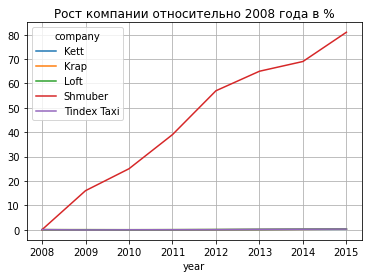

In [8]:
pivot['rate to 2008'].plot(grid=True, title="Рост компании относительно 2008 года в %");

Немного переработанная метрика, которая была предложена в задании: сколько денег всего компания заработала за время с 2008 года в процентах относительно того, что было в 2008. Что-то похожее на "насколько выросла компания по выручке". Впечатляющий рост! Посмотрим, насколько он стабильный.

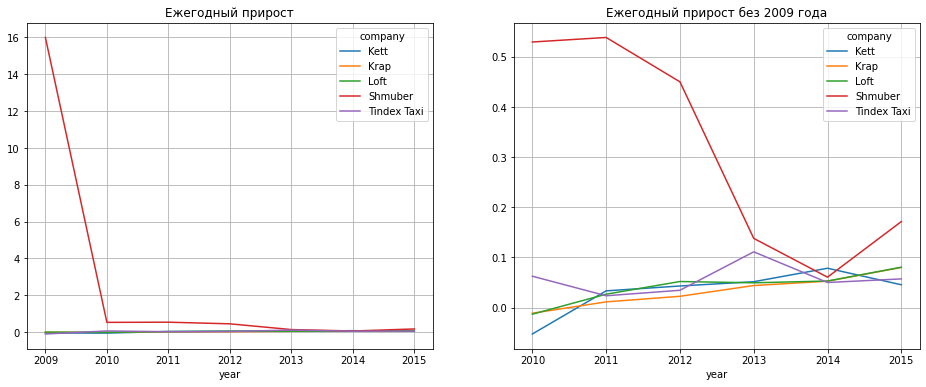

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
pivot['rate'].plot(grid=True, title="Ежегодный прирост", ax=axs[0]);
pivot['rate'].iloc[2:, :].plot(grid=True, title="Ежегодный прирост без 2009 года", ax=axs[1]);

Видно, что рост Шмабера скорее обязан какому-то стечению обстоятельств или событию (инвестиции, крупный займ или просто хайп), чем грамотной бизнес модели и талантам менеджммента.

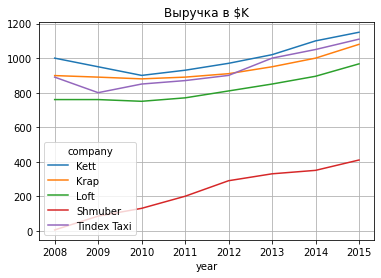

In [10]:
pivot['revenue'].plot(grid=True, title="Выручка в $K");

Вот важный график, который показывает, сколько компания реально зарабатывает, а также позицию относительно компаний-конкурентов.

Еще было бы интересно посчитать [совокупный среднегодовой темп роста](https://www.investopedia.com/terms/c/cagr.asp). И лучше без 2009 года.

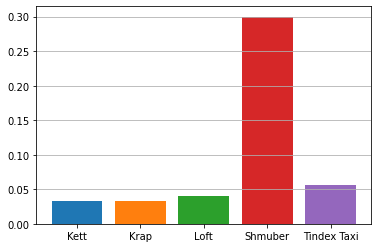

In [11]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

avg_rates = (
    ( pivot["revenue"].iloc[-1, :] / pivot["revenue"].iloc[1, :] )
    .apply(lambda x: x ** (1 / (len(pivot.index) - 2)) - 1)
    .to_frame()
    .rename(columns={0: "rate"})
)

plt.grid(True, axis="y")
plt.bar(avg_rates.index, avg_rates.rate, color=colors);

## Вывод

Неясно зачем Shmuber хотели скрыть свою реальную выручку. Темпы роста компании довольно приличные — 30% в год в среднем, что очень неплохо. Думаю, менеджменту как раз стоило сделать упор на это (только не показывать график роста к предыдущему году 🙂). Можно было показать график реальной выручки и проекции на будущее при условии сохранения темпов роста компаний.

Для рассуждений об эффективности компании (или принятия иныестиционного решения) данных мало, хочется еще посмотреть на процент заемных денег в капитале: если выручка росла только за счет долга, то это не так интересно. Было бы любобытно посмотреть на чистую прибыль и прибыль по EBITDA. С другой стороны тот факт, что темпы роста компании быстро замедляются год к году, уже является сильным звонком, чтобы пока, например, не инвестировать в компанию или не выплачивать огромные премии менеджменту.

# Второе задание 

In [12]:
df = pd.read_csv("false_plots_data2.csv", sep=";")
df

,company,"revenue, $M","share, %",year
0,Filip,109,8.3%,2019
1,Widek,100,7.6%,2019
2,Zanudsi,80,6.1%,2019
3,Samzunh,77,5.9%,2019
4,Paranoic,77,5.9%,2019
5,Brenni,60,4.6%,2019
6,others,811,61.7%,2019


In [13]:
df.columns = ["company", "revenue", "share", "year"]
df["share"] = df["share"].apply(lambda x: float(x.strip("%")) / 100)
df

,company,revenue,share,year
0,Filip,109,0.083,2019
1,Widek,100,0.076,2019
2,Zanudsi,80,0.061,2019
3,Samzunh,77,0.059,2019
4,Paranoic,77,0.059,2019
5,Brenni,60,0.046,2019
6,others,811,0.617,2019


In [14]:
df.dtypes

company     object
revenue      int64
share      float64
year         int64
dtype: object

In [15]:
df

,company,revenue,share,year
0,Filip,109,0.083,2019
1,Widek,100,0.076,2019
2,Zanudsi,80,0.061,2019
3,Samzunh,77,0.059,2019
4,Paranoic,77,0.059,2019
5,Brenni,60,0.046,2019
6,others,811,0.617,2019


Исходный график:

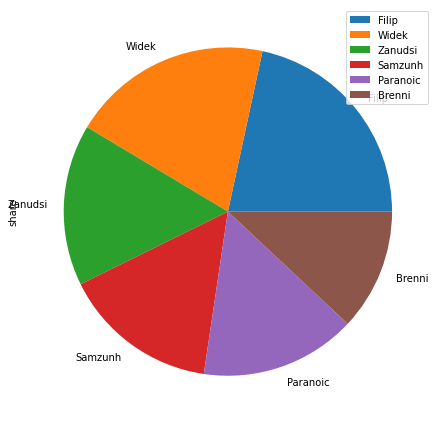

In [16]:
# def foo():
#     i = 0
#     def bar(_):
#         nonlocal i
#         j = i
#         i += 1
#         return f'{df["share"][j] * 100 :.2f}%'
#     return bar

# df.set_index("company").drop(index="others").plot.pie(y="share", figsize=(8, 6), normalize=True, autopct=foo())
df.set_index("company").drop(index="others").plot.pie(y="share", figsize=(8, 6), normalize=True)
plt.tight_layout()

График мега-дурацкий: на нем не видно, какую часть рынука занимает та или иная компания, невозможно сравнить доли компаний между собой, а главное — создается впечатление, что рынок поделен между этими шестью компаниями.

Ниже — честный вариант графика:

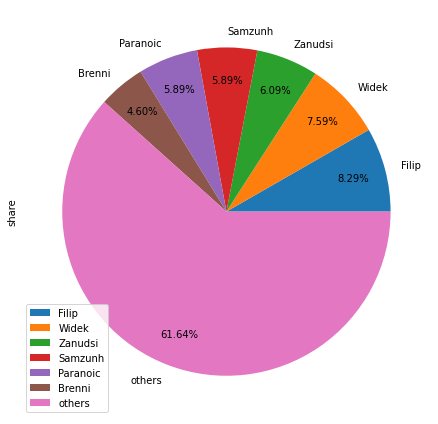

In [17]:
df.set_index("company").plot.pie(y="share", figsize=(8, 6), autopct=lambda x: f"{x:.2f}%", pctdistance=0.8)
plt.tight_layout()

Или вот такой. (Я из тех, кто считает пироги не очень полезными [пардон, за каламбур :)])

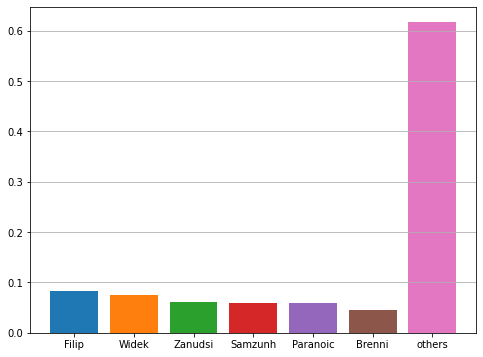

In [18]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(8, 6))
plt.grid(True, axis="y")
plt.bar(df.company, df.share, color=colors);

## Вывод (исключительно ради симметрии с первым заданием)

1. Чужим графикам верить нельзя, если нужно приянть решение на основе графика, то строить его надо самостоятельно. (Но от манипуляций с изходными данными это не защитит, вообще говоря).
1. Если категорий для отображения больше 4х, не используй бублики и пироги...